In [2]:
import numpy as np
import torch 
from torch import nn
from torch.nn import functional as F

from typing import List, Callable, Union, Any, TypeVar, Tuple
Tensor = TypeVar('torch.tensor')

import torch.optim as optim


# Data preprocessing utils : 
from utils.acdc_dataset import ACDC_Dataset, One_hot_Transform, load_dataset
from torchvision.transforms import Compose
from torchvision import transforms

from torch.utils.data import DataLoader


# Visuals utils
import os
import matplotlib.pyplot as plt
from tqdm import tqdm


# my defined model
from utils.vqVAE import VQVAE

from matplotlib.colors import ListedColormap


In [28]:
def codebook_hist_testset(model, val_loader):
    model.eval()
    hist = torch.zeros(model.vq_layer.K).to(device)
    with torch.no_grad():
        for batch in val_loader:
            hist += model.codebook_usage(batch.float().to(device))
    unused_codes = len(np.where(hist == 0.0)[0])

    percentage = (model.vq_layer.K - unused_codes)*100/model.vq_layer.K

    print(f" ONLY {model.vq_layer.K - unused_codes} OF CODES WERE USED, WHICH MAKE {percentage} % OF CODES FROM THE CODE-BOOK")
    return hist



def codebook_distances(model):
    pass



def codebook_cosinesim(model):
    pass



In [4]:

L = 128 # image size L=W
BATCH_SIZE = 16



In [5]:
dataset_path = "/home/ids/ihamdaoui-21/ACDC/database"

train_set_path = os.path.join(dataset_path, "training")
test_set_path  = os.path.join(dataset_path, "testing")

test_dataset  = load_dataset(test_set_path)


In [6]:
input_transforms = Compose([
    transforms.Resize(size=(L,L), interpolation=transforms.InterpolationMode.NEAREST),
    One_hot_Transform(num_classes=4)
    ])


TestDataset  = ACDC_Dataset(data = test_dataset, transforms= input_transforms)

TestLoader   = DataLoader(TestDataset , batch_size = BATCH_SIZE, shuffle = True)

In [7]:
K =  512 # num_embeddings
D =  64 # embedding_dim
in_channels = 4 


In [8]:
# detect gpu ?

print(torch.cuda.is_available())

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

True
cuda:0


In [9]:
vis_batch = next(iter(TestLoader)).to(device)

## Model 100

In [9]:
model_path = 'saved_models/vqvae_100_bestmodel.pth'

model = VQVAE(in_channels, 64, 512)
model.load_state_dict(torch.load(model_path)['model_state_dict'])
model = model.to(device)

In [30]:
def codebook_hist_testset(model, val_loader):
    model.eval()
    hist = torch.zeros(model.vq_layer.K).to(device)
    with torch.no_grad():
        for batch in val_loader:
            hist += model.codebook_usage(batch.float().to(device))

    return hist

In [11]:
hist = codebook_hist_testset(model, TestLoader).detach().cpu().numpy()
# hist = hist/torch.sum(hist)

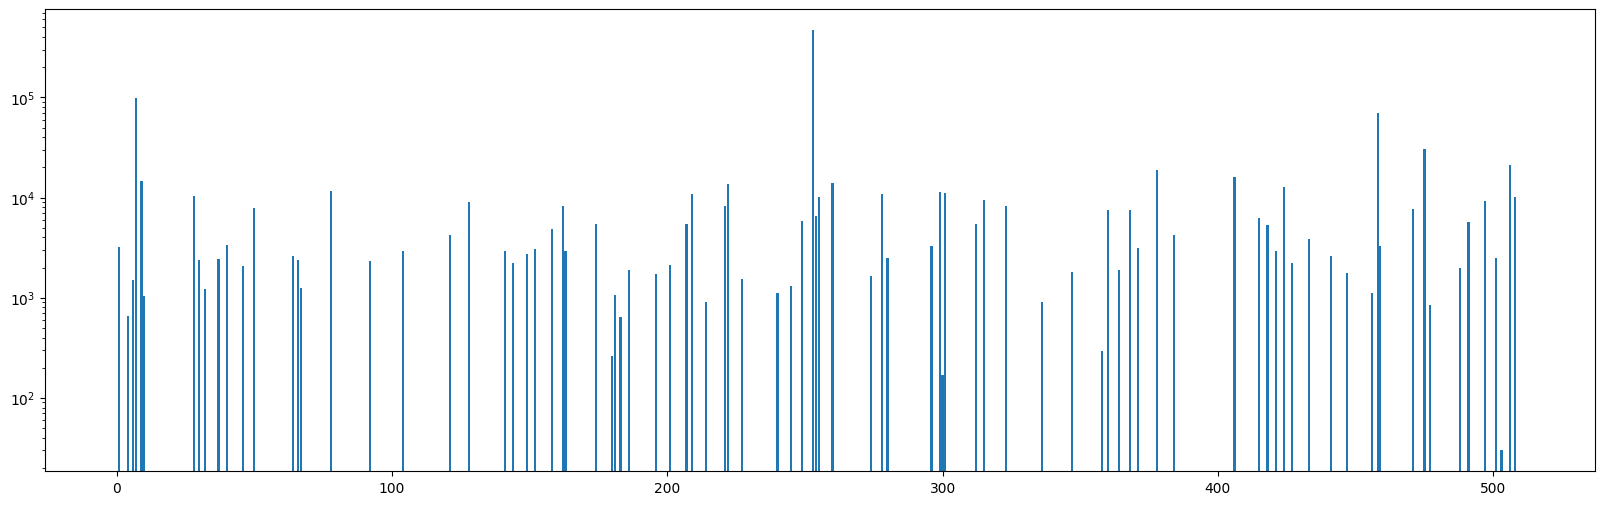

In [12]:
plt.figure(figsize=(20, 6))
plt.bar(range(len(hist)), hist)
plt.yscale('log')

In [13]:
#CodeBook percentage usage 
unused_codes = len(np.where(hist == 0.0)[0])

percentage = (512 - unused_codes)*100/512

print(f" ONLY {512 - unused_codes} OF CODES WERE USED, WHICH MAKE {percentage} % OF CODES FROM THE CODE-BOOK")


 ONLY 89 OF CODES WERE USED, WHICH MAKE 17.3828125 % OF CODES FROM THE CODE-BOOK


In [14]:
import umap
import numpy as np
import matplotlib.pyplot as plt


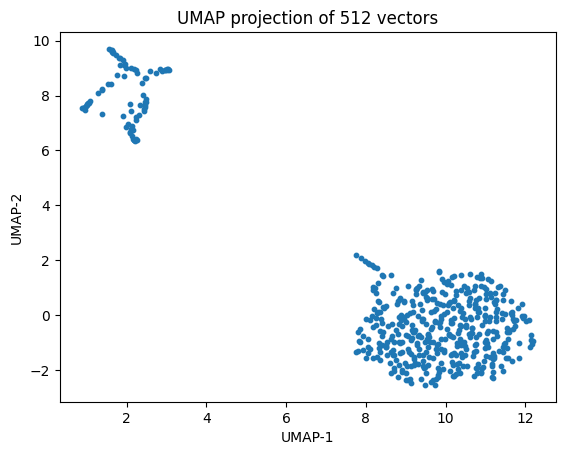

In [15]:
codebook = model.vq_layer.embedding.weight.detach().cpu().numpy()

reducer = umap.UMAP(n_components=2, random_state=42)

# Fit and transform
embedding = reducer.fit_transform(codebook)

# Plot the result
plt.scatter(embedding[:, 0], embedding[:, 1], s=10, cmap='Spectral')
plt.title('UMAP projection of 512 vectors')
plt.xlabel('UMAP-1')
plt.ylabel('UMAP-2')
plt.show()

## Model 101

In [16]:
model_path = 'saved_models/vqvae_101_bestmodel.pth'

model = VQVAE(in_channels, 64, 512)
model.load_state_dict(torch.load(model_path)['model_state_dict'])
model = model.to(device)

In [17]:
hist = codebook_hist_testset(model, TestLoader).detach().cpu().numpy()
# hist = hist/torch.sum(hist)

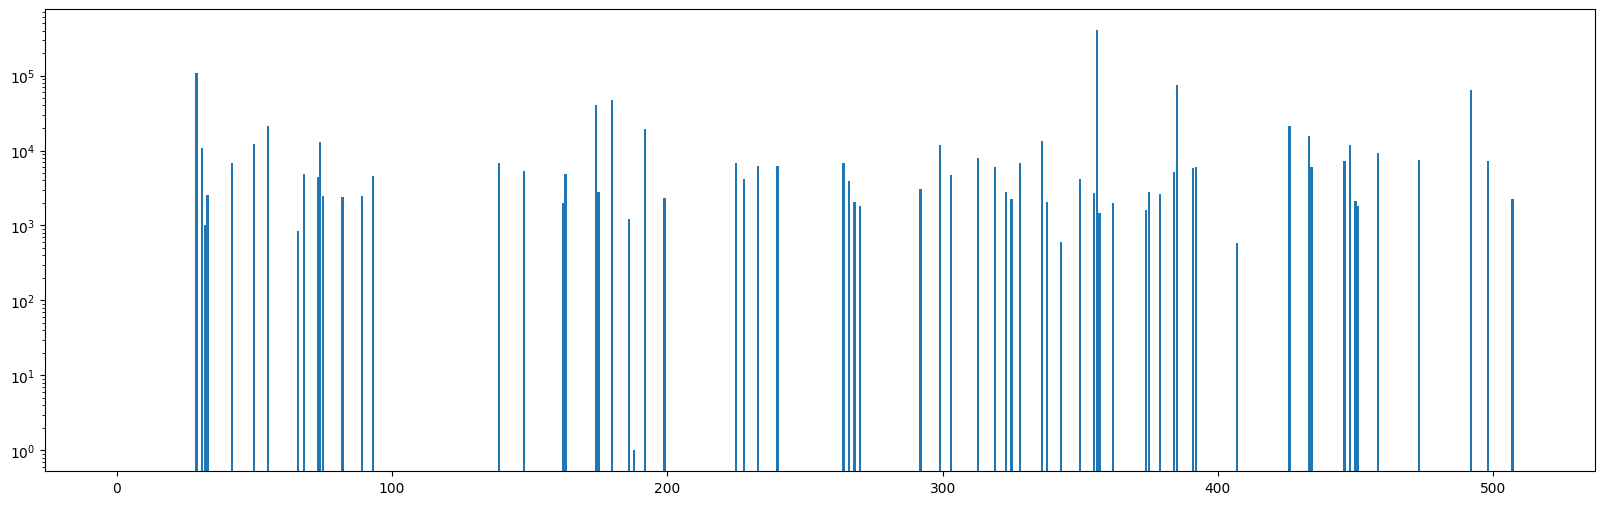

In [18]:
plt.figure(figsize=(20, 6))
plt.bar(range(len(hist)), hist)
plt.yscale('log')

In [19]:
#CodeBook percentage usage 
unused_codes = len(np.where(hist == 0.0)[0])

percentage = (512 - unused_codes)*100/512

print(f" ONLY {512 - unused_codes} OF CODES WERE USED, WHICH MAKE {percentage} % OF CODES FROM THE CODE-BOOK")


 ONLY 70 OF CODES WERE USED, WHICH MAKE 13.671875 % OF CODES FROM THE CODE-BOOK


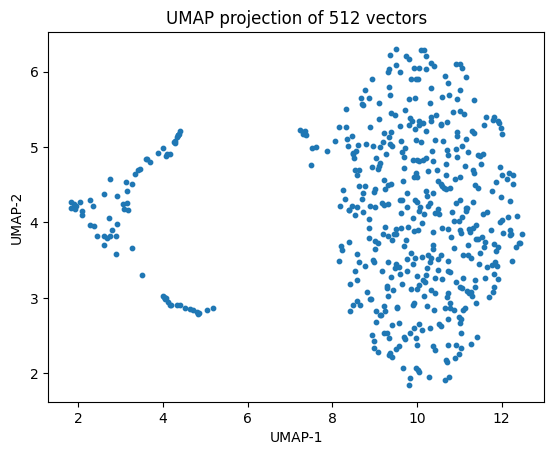

In [20]:
codebook = model.vq_layer.embedding.weight.detach().cpu().numpy()

reducer = umap.UMAP(n_components=2, random_state=42)

# Fit and transform
embedding = reducer.fit_transform(codebook)

# Plot the result
plt.scatter(embedding[:, 0], embedding[:, 1], s=10, cmap='Spectral')
plt.title('UMAP projection of 512 vectors')
plt.xlabel('UMAP-1')
plt.ylabel('UMAP-2')
plt.show()

# Model 102

In [46]:
model_path = 'saved_models/vqvae_102_bestmodel.pth'

model = VQVAE(in_channels, 32, 256)
model.load_state_dict(torch.load(model_path)['model_state_dict'])
model = model.to(device)

In [47]:
hist = codebook_hist_testset(model, TestLoader).detach().cpu().numpy()
# hist = hist/torch.sum(hist)

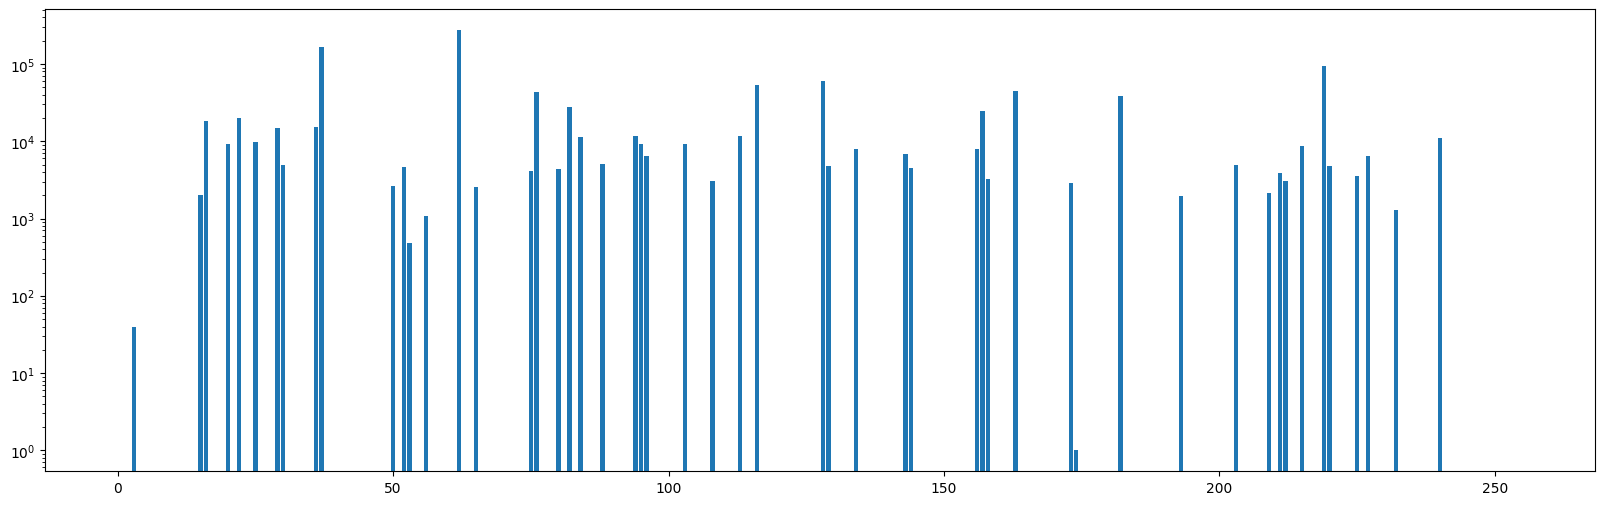

In [48]:
plt.figure(figsize=(20, 6))
plt.bar(range(len(hist)), hist)
plt.yscale('log')

In [51]:
#CodeBook percentage usage 
unused_codes = len(np.where(hist == 0.0)[0])

percentage = (model.vq_layer.K - unused_codes)*100/model.vq_layer.K

print(f" ONLY {model.vq_layer.K - unused_codes} OF CODES WERE USED, WHICH MAKE {percentage} % OF CODES FROM THE CODE-BOOK")


 ONLY 53 OF CODES WERE USED, WHICH MAKE 20.703125 % OF CODES FROM THE CODE-BOOK


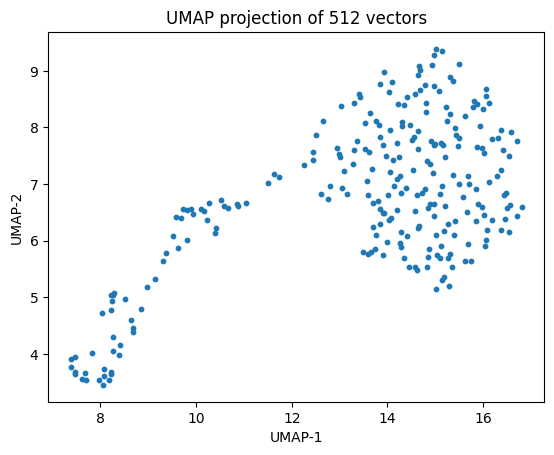

In [34]:
codebook = model.vq_layer.embedding.weight.detach().cpu().numpy()

reducer = umap.UMAP(n_components=2, random_state=42)

# Fit and transform
embedding = reducer.fit_transform(codebook)

# Plot the result
plt.scatter(embedding[:, 0], embedding[:, 1], s=10, cmap='Spectral')
plt.title('UMAP projection of 512 vectors')
plt.xlabel('UMAP-1')
plt.ylabel('UMAP-2')
plt.show()

# Model 103

In [52]:
model_path = 'saved_models/vqvae_103_bestmodel.pth'

model = VQVAE(in_channels, 64, 512)
model.load_state_dict(torch.load(model_path)['model_state_dict'])
model = model.to(device)

In [53]:
hist = codebook_hist_testset(model, TestLoader).detach().cpu().numpy()
# hist = hist/torch.sum(hist)

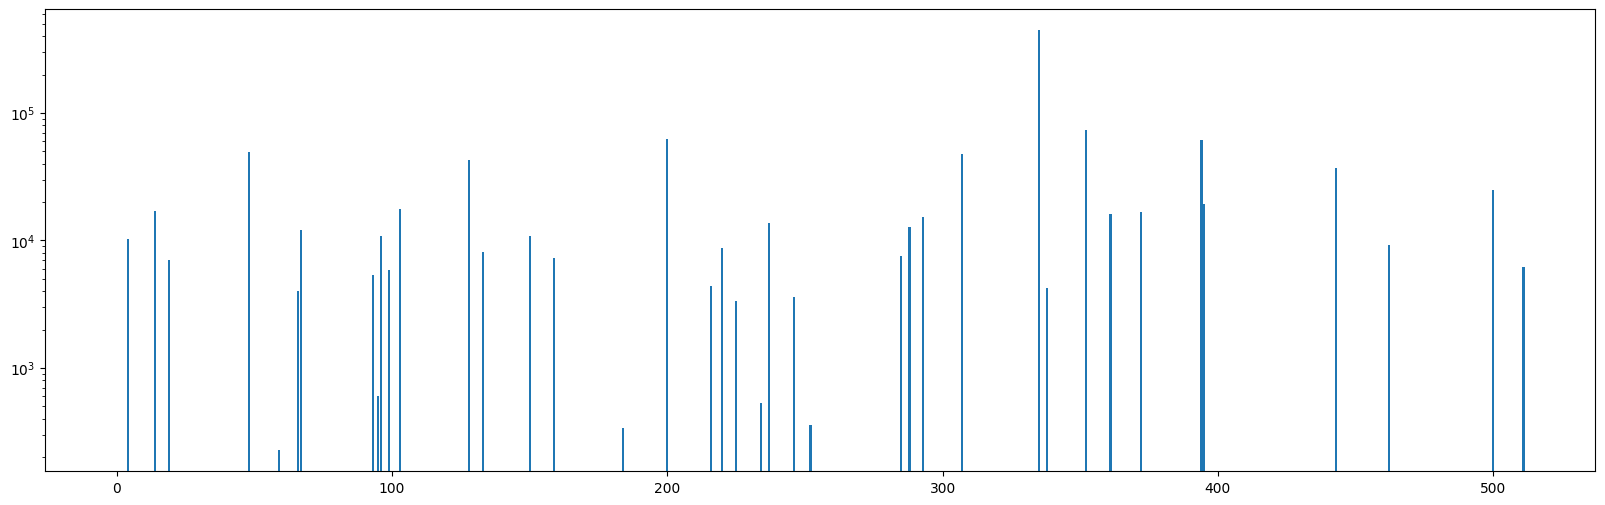

In [54]:
plt.figure(figsize=(20, 6))
plt.bar(range(len(hist)), hist)
plt.yscale('log')

In [55]:
#CodeBook percentage usage 
unused_codes = len(np.where(hist == 0.0)[0])
<
percentage = (512 - unused_codes)*100/512

print(f" ONLY {512 - unused_codes} OF CODES WERE USED, WHICH MAKE {percentage} % OF CODES FROM THE CODE-BOOK")


 ONLY 40 OF CODES WERE USED, WHICH MAKE 7.8125 % OF CODES FROM THE CODE-BOOK


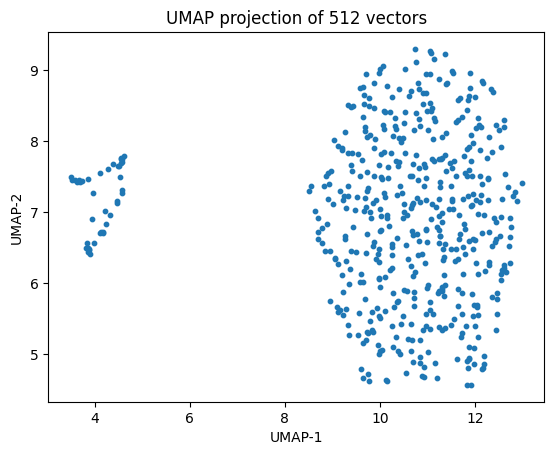

In [56]:
codebook = model.vq_layer.embedding.weight.detach().cpu().numpy()

reducer = umap.UMAP(n_components=2, random_state=42)

# Fit and transform
embedding = reducer.fit_transform(codebook)

# Plot the result
plt.scatter(embedding[:, 0], embedding[:, 1], s=10, cmap='Spectral')
plt.title('UMAP projection of 512 vectors')
plt.xlabel('UMAP-1')
plt.ylabel('UMAP-2')
plt.show()

--------------------------

# Re-Fit model

### model 100

In [43]:
model_path = 'Re_Fit_models/vqvae_100_bestmodel.pth'

model = VQVAE(in_channels, 64, 128)
model.load_state_dict(torch.load(model_path)['model_state_dict'])
model = model.to(device)

/tmp/ipykernel_2752520/3391975194.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path)['model_state_dict'])


In [44]:
hist = codebook_hist_testset(model, TestLoader).detach().cpu().numpy()
# hist = hist/torch.sum(hist)

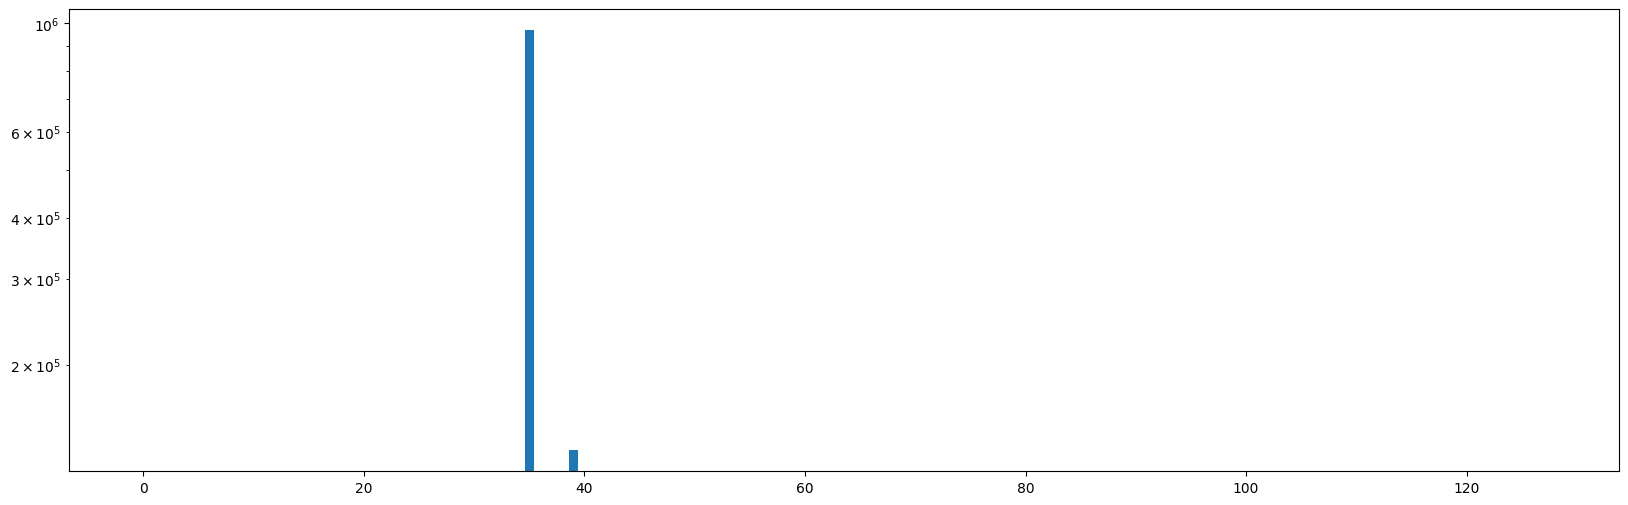

In [45]:
plt.figure(figsize=(20, 6))
plt.bar(range(len(hist)), hist)
plt.yscale('log')

In [46]:
#CodeBook percentage usage 
unused_codes = len(np.where(hist == 0.0)[0])

percentage = (model.vq_layer.K  - unused_codes)*100/model.vq_layer.K 

print(f" ONLY {model.vq_layer.K  - unused_codes} OF CODES WERE USED, WHICH MAKE {percentage} % OF CODES FROM THE CODE-BOOK")


 ONLY 2 OF CODES WERE USED, WHICH MAKE 1.5625 % OF CODES FROM THE CODE-BOOK


/home/ids/ihamdaoui-21/anaconda3/envs/torch/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ids/ihamdaoui-21/anaconda3/envs/torch/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/tmp/ipykernel_2752520/2193139998.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding[:, 0], embedding[:, 1], s=10, cmap='Spectral')


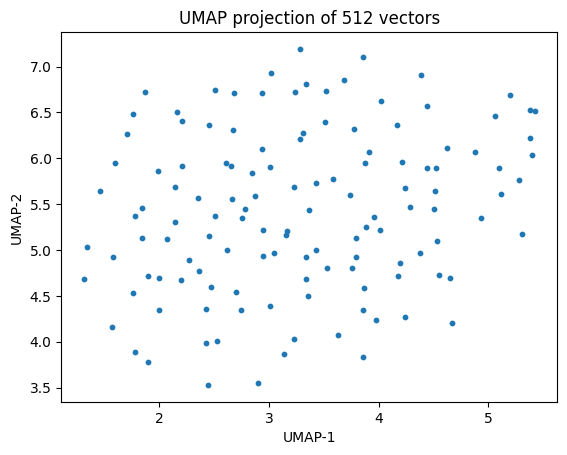

In [47]:
import umap

codebook = model.vq_layer.embedding.weight.detach().cpu().numpy()

reducer = umap.UMAP(n_components=2, random_state=42)

# Fit and transform
embedding = reducer.fit_transform(codebook)

# Plot the result
plt.scatter(embedding[:, 0], embedding[:, 1], s=10, cmap='Spectral')
plt.title('UMAP projection of 512 vectors')
plt.xlabel('UMAP-1')
plt.ylabel('UMAP-2')
plt.show()

### model 101

In [48]:
model_path = 'Re_Fit_models/vqvae_101_bestmodel.pth'

model = VQVAE(in_channels, 64, 256)
model.load_state_dict(torch.load(model_path)['model_state_dict'])
model = model.to(device)

/tmp/ipykernel_2752520/2892555141.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path)['model_state_dict'])


In [49]:
hist = codebook_hist_testset(model, TestLoader).detach().cpu().numpy()
# hist = hist/torch.sum(hist)

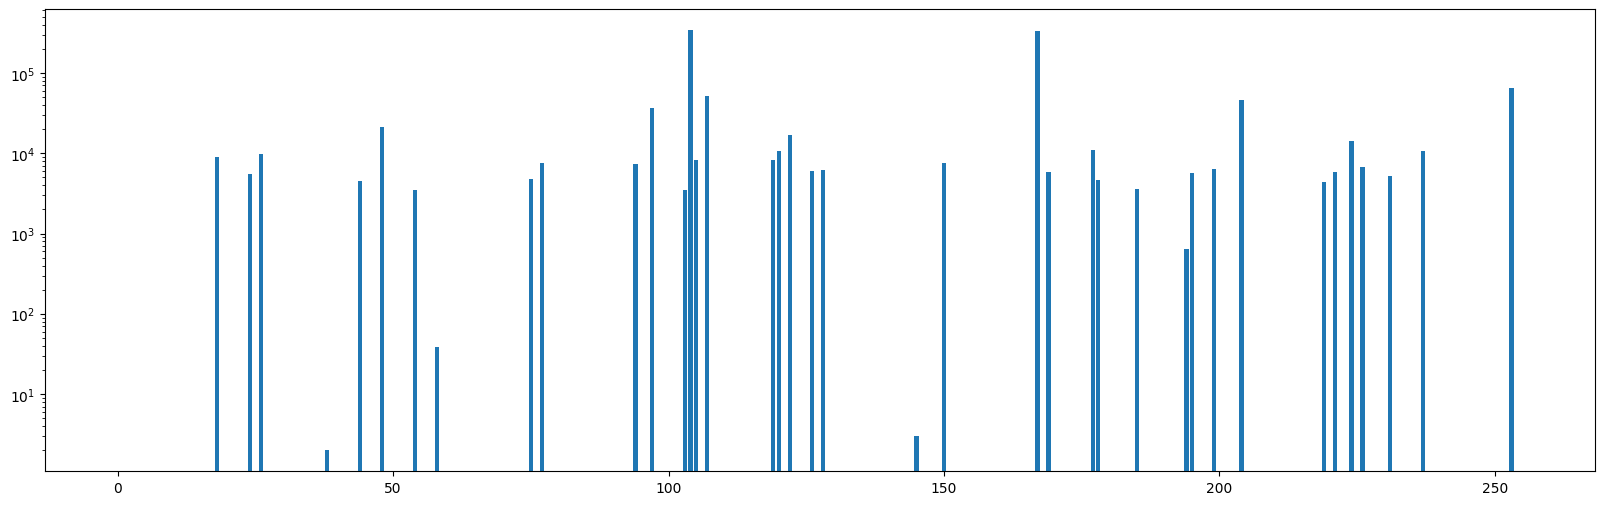

In [50]:
plt.figure(figsize=(20, 6))
plt.bar(range(len(hist)), hist)
plt.yscale('log')

In [51]:
#CodeBook percentage usage 
unused_codes = len(np.where(hist == 0.0)[0])

percentage = (model.vq_layer.K  - unused_codes)*100/model.vq_layer.K 

print(f" ONLY {model.vq_layer.K  - unused_codes} OF CODES WERE USED, WHICH MAKE {percentage} % OF CODES FROM THE CODE-BOOK")


 ONLY 39 OF CODES WERE USED, WHICH MAKE 15.234375 % OF CODES FROM THE CODE-BOOK


/home/ids/ihamdaoui-21/anaconda3/envs/torch/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ids/ihamdaoui-21/anaconda3/envs/torch/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/tmp/ipykernel_2752520/2193139998.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding[:, 0], embedding[:, 1], s=10, cmap='Spectral')


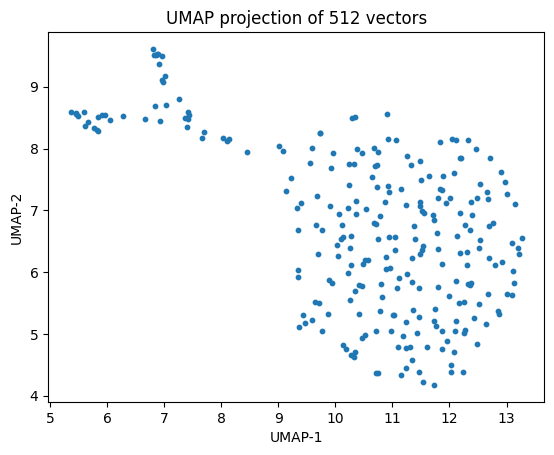

In [52]:
import umap

codebook = model.vq_layer.embedding.weight.detach().cpu().numpy()

reducer = umap.UMAP(n_components=2, random_state=42)

# Fit and transform
embedding = reducer.fit_transform(codebook)

# Plot the result
plt.scatter(embedding[:, 0], embedding[:, 1], s=10, cmap='Spectral')
plt.title('UMAP projection of 512 vectors')
plt.xlabel('UMAP-1')
plt.ylabel('UMAP-2')
plt.show()